In [1]:
# нульмерная постановка

from pyballistics import ozvb_termo, get_options_agard

In [2]:
opts = get_options_agard()

In [3]:
opts

{'powders': [{'I_e': 250495,
   'T_c': 2585,
   'b': 0.0010838,
   'f': 1009000.0,
   'k': 1.27,
   'kappa_1': 0.7185,
   'kappa_2': 0.5386,
   'lambda_1': 0.2049,
   'lambda_2': -0.8977,
   'mu_1': -0.0217,
   'nu': 0.9,
   'omega': 9.5255,
   'delta': 1575,
   'z_e': 1.56}],
 'init_conditions': {'q': 45.359,
  'd': 0.132,
  'W_0': 0.016537326388888888,
  'T_0': 293.15,
  'phi_1': 1.0,
  'p_0': 13790000.0},
 'igniter': {'p_ign_0': 1000000.0,
  'k_ign': 1.25,
  'T_ign': 1706,
  'f_ign': 260000.0,
  'b_ign': 0.0006},
 'meta_termo': {'dt': 5e-06, 'method': 'rk2'},
 'meta_lagrange': {'CFL': 0.9, 'n_cells': 150},
 'stop_conditions': {'x_p': 4.318}}

In [4]:
res = ozvb_termo(opts)

In [5]:
res

{'t': array([0.0000e+00, 5.0000e-06, 1.0000e-05, ..., 2.0875e-02, 2.0880e-02,
        2.0885e-02]),
 'p_m': array([ 1000000.        ,  1003231.47157613,  1006472.69240699, ...,
        98362920.55768356, 98283386.16665041, 98242397.74880771]),
 'T': array([1706.        , 1707.77608287, 1709.55013928, ..., 1748.52359461,
        1748.17732499, 1747.9987426 ]),
 'x_p': array([0.        , 0.        , 0.        , ..., 4.31317965, 4.31635932,
        4.318     ]),
 'v_p': array([  0.        ,   0.        ,   0.        , ..., 635.86582798,
        636.00329662, 636.07415582]),
 'Q_pa': array([    0.        ,     0.        ,     0.        , ...,
        29957.8217472 , 29992.08694383, 30009.77328626]),
 'Q_w': array([      0.        ,       0.        ,       0.        , ...,
        1511564.91053336, 1512590.21753456, 1513119.24099482]),
 'W_p': array([0.01653733, 0.01653733, 0.01653733, ..., 0.07556223, 0.07560574,
        0.0756282 ]),
 'W_c': array([0.00607209, 0.0060721 , 0.00607212, ...,

In [6]:
type(res)

dict

In [7]:
res.keys()

dict_keys(['t', 'p_m', 'T', 'x_p', 'v_p', 'Q_pa', 'Q_w', 'W_p', 'W_c', 'T_w', 'k', 'z_1', 'psi_1', 'stop_reason', 'execution_time'])

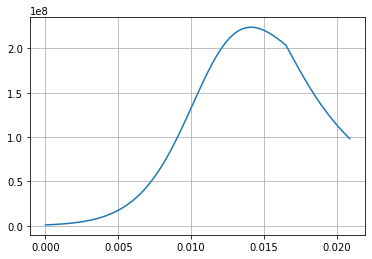

In [8]:
import matplotlib.pyplot as plt

plt.plot(res['t'], res['p_m'])
plt.grid()
plt.show()

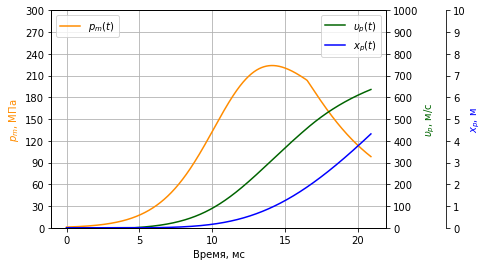

In [9]:
import numpy as np

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

# host.set_xlim(0, 21)

plim = (0,300)
vlim = (0, 1000)
xlim = (0, 10)

host.set_ylim(*plim)
par1.set_ylim(*vlim)
par2.set_ylim(*xlim)

n=11
host.yaxis.set_ticks(np.linspace(*plim, n))
par1.yaxis.set_ticks(np.linspace(*vlim, n))
par2.yaxis.set_ticks(np.linspace(*xlim, n))

host.set_xlabel("Время, мс")
host.set_ylabel("$p_m$, МПа")
par1.set_ylabel("$\\upsilon_p$, м/с")
par2.set_ylabel("$x_p$, м")

color1 = 'darkorange' # plt.cm.viridis(0)
color2 = 'darkgreen' # plt.cm.viridis(0.5)
color3 = 'blue' # plt.cm.viridis(.9)

p1, = host.plot(res['t']*1e3, res['p_m']/1e6, color=color1, label='$p_m(t)$')
p2, = par1.plot(res['t']*1e3, res['v_p'], color=color2, label='$\\upsilon_p(t)$')
p3, = par2.plot(res['t']*1e3, res['x_p'], color=color3, label='$x_p(t)$')

lns = [p1]
lns2 = [p2, p3]
host.legend(handles=lns, loc='upper left')
par1.legend(handles=lns2, loc='upper right')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())


host.grid()
plt.show()

In [10]:
# квазиодномерная постановка

from pyballistics import ozvb_lagrange

In [11]:
res = ozvb_lagrange(opts)

In [12]:
res.keys()

dict_keys(['stop_reason', 'execution_time', 'layers'])

In [13]:
len(res['layers'])

1393

In [14]:
res['layers'][0]

{'t': 0.0,
 'step_count': 0,
 'x': array([-1.20844685, -1.20039054, -1.19233423, -1.18427791, -1.1762216 ,
        -1.16816529, -1.16010898, -1.15205266, -1.14399635, -1.13594004,
        -1.12788373, -1.11982741, -1.1117711 , -1.10371479, -1.09565848,
        -1.08760217, -1.07954585, -1.07148954, -1.06343323, -1.05537692,
        -1.0473206 , -1.03926429, -1.03120798, -1.02315167, -1.01509535,
        -1.00703904, -0.99898273, -0.99092642, -0.98287011, -0.97481379,
        -0.96675748, -0.95870117, -0.95064486, -0.94258854, -0.93453223,
        -0.92647592, -0.91841961, -0.91036329, -0.90230698, -0.89425067,
        -0.88619436, -0.87813804, -0.87008173, -0.86202542, -0.85396911,
        -0.8459128 , -0.83785648, -0.82980017, -0.82174386, -0.81368755,
        -0.80563123, -0.79757492, -0.78951861, -0.7814623 , -0.77340598,
        -0.76534967, -0.75729336, -0.74923705, -0.74118073, -0.73312442,
        -0.72506811, -0.7170118 , -0.70895549, -0.70089917, -0.69284286,
        -0.684786

In [15]:
res['layers'][0].keys()

dict_keys(['t', 'step_count', 'x', 'u', 'T', 'rho', 'p', 'T_w', 'k', 'z_1', 'psi_1'])

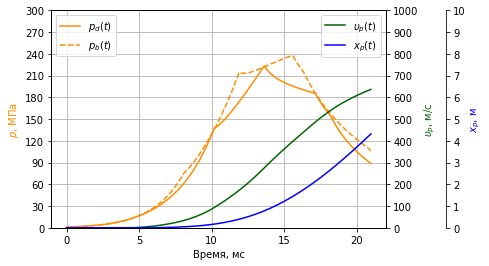

In [16]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

# host.set_xlim(0, 21)

plim = (0,300)
vlim = (0, 1000)
xlim = (0, 10)

host.set_ylim(*plim)
par1.set_ylim(*vlim)
par2.set_ylim(*xlim)

n=11
host.yaxis.set_ticks(np.linspace(*plim, n))
par1.yaxis.set_ticks(np.linspace(*vlim, n))
par2.yaxis.set_ticks(np.linspace(*xlim, n))

host.set_xlabel("Время, мс")
host.set_ylabel("$p$, МПа")
par1.set_ylabel("$\\upsilon_p$, м/с")
par2.set_ylabel("$x_p$, м")

color1 = 'darkorange' # plt.cm.viridis(0)
color2 = 'darkgreen' # plt.cm.viridis(0.5)
color3 = 'blue' # plt.cm.viridis(.9)

ps_d = np.array([lr['p'][-1] for lr in res['layers']])
ps_b = np.array([lr['p'][0] for lr in res['layers']])
v_p = np.array([lr['u'][-1] for lr in res['layers']])
x_p = np.array([lr['x'][-1] for lr in res['layers']])
ts =  np.array([lr['t'] for lr in res['layers']])

p1, = host.plot(ts*1e3, ps_d/1e6, color=color1, label='$p_d(t)$')
p11, = host.plot(ts*1e3, ps_b/1e6, '--', color=color1, label='$p_b(t)$')
p2, = par1.plot(ts*1e3, v_p, color=color2, label='$\\upsilon_p(t)$')
p3, = par2.plot(ts*1e3, x_p, color=color3, label='$x_p(t)$')

lns = [p1, p11]
lns2 = [p2, p3]
host.legend(handles=lns, loc='upper left')
par1.legend(handles=lns2, loc='upper right')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())


host.grid()
plt.show()

In [17]:
from ipywidgets import interact, interactive, fixed
import ipywidgets

%matplotlib inline 

what_plots = ['u', 'T', 'rho', 'p', 'T_w', 'k', 'z_1', 'psi_1']
maxes = {}
for k in what_plots:
    maxes[k] = np.max(res['layers'][0][k])
    for lr in res['layers'][1:]:
        mx = np.max(lr[k])
        if mx > maxes[k]:
            maxes[k] = mx

@interact(step=ipywidgets.IntSlider(min=0,max=len(res['layers'])-1,step=10, value=0),
         i_plot=ipywidgets.IntSlider(min=0,max=len(what_plots)-1,step=1, value=0))
def plot_foo(step, i_plot):
    lr = res['layers'][step]
    t = lr['t']
    what_plot = what_plots[i_plot]
    xs = lr['x'] if what_plot == 'u' else (lr['x'][:-1] + lr['x'][1:]) * 0.5
    ys = lr[what_plot]
    plt.plot(xs, ys)
    plt.ylim(-0.05*maxes[what_plot], 1.05*maxes[what_plot])
    plt.grid()
    plt.title(f'{step=}, {t=:.5f}, {what_plot=}')
    plt.show()

interactive(children=(IntSlider(value=0, description='step', max=1392, step=10), IntSlider(value=0, descriptio…